In [2]:
simulation = read.csv('output/simulation/simulation.csv', sep=',')

head(simulation)

actual_treatment,bor.cyc.dex,bor.dex,bor.len.dex,len.dex,simulated_treatment
Bor-Len-Dex,0.05878889,0.05878889,0.06798916,0.05878889,Bor-Len-Dex
Bor-Len-Dex,0.38353607,0.38353607,0.38353607,0.38353607,Bor-Len-Dex
Bor-Len-Dex,0.29957958,0.29957958,0.29957958,0.29957958,Bor-Len-Dex
Bor-Cyc-Dex,0.07120492,0.07120492,0.08040518,0.07120492,Bor-Len-Dex
Bor-Len-Dex,0.47173991,0.47173991,0.47173991,0.47173991,Bor-Len-Dex
Bor-Cyc-Dex,0.30255651,0.30255651,0.31454493,0.30255651,Bor-Len-Dex


In [12]:
agg <- aggregate(. ~ actual_treatment + simulated_treatment, data=simulation, FUN=length)

agg = data.frame(actual_treatment=agg$actual_treatment, 
                 simulated_treatment=agg$simulated_treatment, 
                 length=agg$bor.cyc.dex)

agg

actual_treatment,simulated_treatment,length
Bor-Cyc-Dex,Bor-Cyc-Dex,86
Bor-Dex,Bor-Dex,50
Bor-Cyc-Dex,Bor-Len-Dex,56
Bor-Dex,Bor-Len-Dex,14
Bor-Len-Dex,Bor-Len-Dex,236
Len-Dex,Bor-Len-Dex,14
Len-Dex,Len-Dex,36


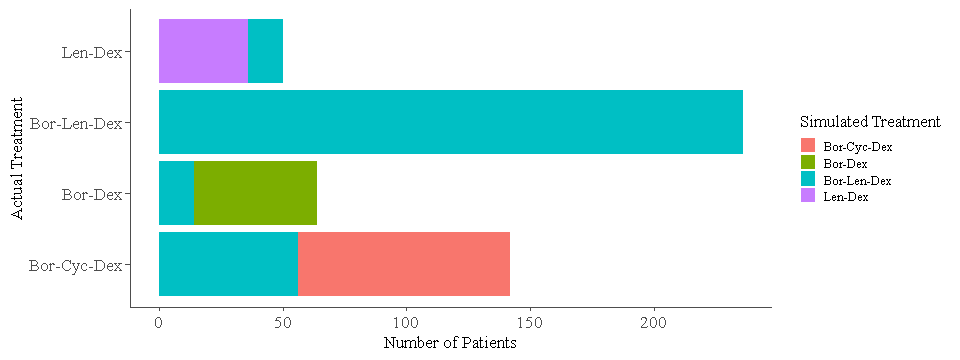

In [27]:
library(ggplot2)

ticks.line.color <- 'grey30'

p <- ggplot(agg, aes(x=actual_treatment, y=length, fill=simulated_treatment)) + 
     geom_bar(position="stack", stat="identity") +
     xlab('Actual Treatment') + 
     ylab('Number of Patients') +
     theme_bw() + 
     theme(panel.border          = element_blank(), 
           panel.grid.major      = element_blank(),
           panel.grid.minor      = element_blank(), 
           axis.line             = element_line(colour=ticks.line.color),
           text                  = element_text(size=10, family="serif"),
           legend.key.size       = unit(10, "pt"),
           legend.position       = 'right',
           axis.text.x           = element_text(size=10, angle=0, colour=ticks.line.color),
           axis.text.y           = element_text(size=10, colour=ticks.line.color),
           axis.title.x          = element_text(vjust=1),
           axis.ticks            = element_line(color=ticks.line.color),
           plot.background       = element_rect(fill = "transparent", color=NA), # bg of the plot
           legend.box.background = element_rect(color=NA, fill = "transparent"), # get rid of legend panel bg
           legend.background     = element_rect(colour=NA, size=0),
           legend.key            = element_rect(fill="transparent", colour=NA) # get rid of key legend fill, 
                                                                               #and of the surrounding
    ) +
    scale_fill_discrete(name = "Simulated Treatment") + coord_flip()
     
ggsave('images/simulation.pdf', p, units='cm', width=18, height=5)

options(repr.plot.width=8, repr.plot.height=3)

p